In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [0]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
learning_rate = 0.5
epochs = 10
batch_size = 1000

In [0]:
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([784, 1024], stddev=0.03), name='W1')
b1 = tf.Variable(tf.random_normal([1024]), name='b1')
W2 = tf.Variable(tf.random_normal([1024, 1024], stddev=0.03), name='W2')
b2 = tf.Variable(tf.random_normal([1024]), name='b2')
W3 = tf.Variable(tf.random_normal([1024, 1024], stddev=0.03), name='W3')
b3 = tf.Variable(tf.random_normal([1024]), name='b3')
W4 = tf.Variable(tf.random_normal([1024, 1024], stddev=0.03), name='W4')
b4 = tf.Variable(tf.random_normal([1024]), name='b4')
W5 = tf.Variable(tf.random_normal([1024, 1024], stddev=0.03), name='W5')
b5 = tf.Variable(tf.random_normal([1024]), name='b5')
W6 = tf.Variable(tf.random_normal([784, 300], stddev=0.03), name='W6')
b6 = tf.Variable(tf.random_normal([300]), name='b6')
W7 = tf.Variable(tf.random_normal([300, 10], stddev=0.03), name='W7')
b7 = tf.Variable(tf.random_normal([10]), name='b7')

#L1 = tf.nn.sigmoid(tf.add(tf.matmul(x, W1), b1))
L1 = tf.nn.softmax(tf.add(tf.matmul(x, W1), b1))
#L2 = tf.nn.tanh(tf.add(tf.matmul(L1, W2), b2))
L2 = tf.nn.softmax(tf.add(tf.matmul(L1, W2), b2))
L3 = tf.nn.softmax(tf.add(tf.matmul(L2, W3), b3))
L4 = tf.nn.softmax(tf.add(tf.matmul(L3, W4), b4))
L5 = tf.nn.softmax(tf.add(tf.matmul(L4, W5), b5))
L6 = tf.nn.relu(tf.add(tf.matmul(x, W6), b6))
#L6 = tf.add(tf.matmul(L5, W6), b6)
Y = tf.nn.softmax(tf.add(tf.matmul(L6, W7), b7))

In [0]:
#cross_entropy = -tf.reduce_mean(tf.reduce_sum(y - Y, axis=1))
y_clipped = tf.clip_by_value(Y, 1e-10, 0.9999999)
cross_entropy = -tf.reduce_mean(tf.reduce_sum(y * tf.log(y_clipped)
                         + (1 - y) * tf.log(1 - y_clipped), axis=1))
optimiser = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cross_entropy)

In [0]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
images,labels=mnist.test.next_batch(batch_size=1000)

In [97]:
with tf.Session() as sess:
    # initialise the variables
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    total_batch = int(len(mnist.train.labels) / batch_size)
    for epoch in range(epochs):
        avg_cost = 0
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size=batch_size)
            _ , c = sess.run([optimiser, cross_entropy], feed_dict={x: batch_x, y: batch_y})
            avg_cost += c / total_batch
        print("Epoch:", (epoch + 1), "cost =", "{:.3f}".format(avg_cost))    
    print(sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))
    output_layer,hidden_layer=sess.run([Y,L5], feed_dict={x: images})

Epoch: 1 cost = 1.674
Epoch: 2 cost = 0.559
Epoch: 3 cost = 0.427
Epoch: 4 cost = 0.352
Epoch: 5 cost = 0.303
Epoch: 6 cost = 0.266
Epoch: 7 cost = 0.239
Epoch: 8 cost = 0.220
Epoch: 9 cost = 0.200
Epoch: 10 cost = 0.186
0.9646


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """


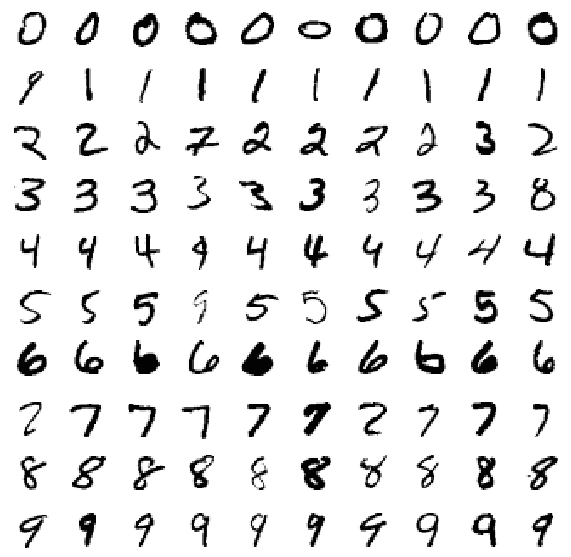

In [109]:
plt.figure(figsize=(10, 10))
for i in range(10):
  j=0
  for k in range(1000):
    if(pd.Series(output_layer[k,:]).argmax()==i ):
      plt.subplot(10, 10, (i*10)+j + 1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(images[k].reshape(28, 28))
      j=j+1
    if(j==10):
      break
plt.show()

In [137]:
hidden_units=np.random.randint(0,1023, 10)
print("Chosen Hidden Unit in last hidden layer:",hidden_units)

Chosen Hidden Unit in last hidden layer: [618 612 897 241 797 516 627 784  15  65]


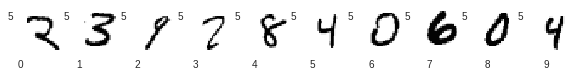

In [143]:
plt.figure(figsize=(10, 10))
for i in range(10):
  j=0
  for k in range(1000):
    if(pd.Series(hidden_layer[k,hidden_units]).nlargest(1).index==i):
      plt.subplot(10, 10, (i*10) + j + 1)
      plt.xticks([j])
      plt.yticks([i])
      plt.grid(False)
      plt.imshow(images[k].reshape(28, 28))
      j=j+1
      if(j==10):
        break
plt.show()

In [0]:
pca = PCA(n_components=2)
reduced_data=pca.fit_transform(images)
reduced_data=pd.DataFrame(reduced_data.copy())

In [0]:
reduced_data['label']=labels.argmax(axis=1)


In [0]:
reduced_data.columns=['x','y','label']


In [204]:
reduced_data.head()

,x,y,label
0,-1.555785,-0.987793,2
1,0.952797,2.969048,3
2,-2.882632,1.651702,9
3,-1.612179,-0.665968,2
4,-0.717595,0.487734,8


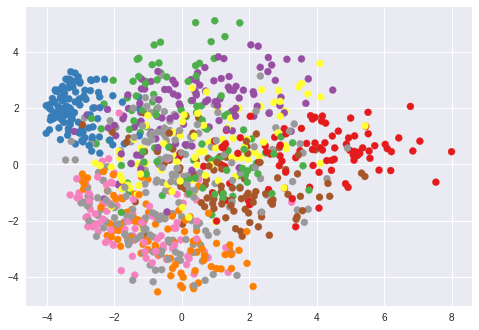

In [209]:
plt.scatter(x=reduced_data.iloc[:,0], y=reduced_data.iloc[:,1],c=reduced_data.iloc[:,2],cmap=plt.get_cmap('Set1')  )
plt.show()

In [0]:
tsne = TSNE(n_components=2)
reduced_data=pca.fit_transform(images)
reduced_data=pd.DataFrame(reduced_data.copy())
reduced_data['label']=labels.argmax(axis=1)
reduced_data.columns=['x','y','label']

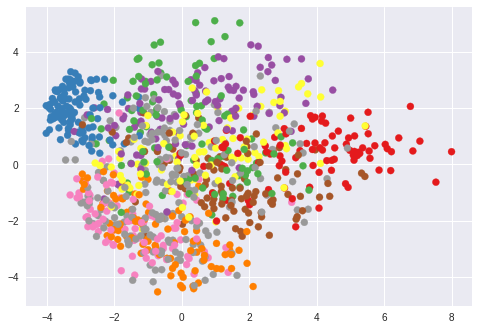

In [212]:
plt.scatter(x=reduced_data.iloc[:,0], y=reduced_data.iloc[:,1],c=reduced_data.iloc[:,2],cmap=plt.get_cmap('Set1')  )
plt.show()